In [12]:
companies= ["AAPL","FDM.L","IAG.L","^GSPC"]
days_back="60" #How far back should the search go?

<h1 style = "text-align:center">High Level Analysis of Various Stocks and Indexes</h1>

### Introduction 
This analysis document follows the performance several difference stocks and indexes over last {{a}} days. The ticker symbols that are analysed in this notebook include:

In [36]:
for company in companies:
    print("-- " + company)
    

-- AAPL
-- FDM.L
-- IAG.L
-- ^GSPC


In [24]:
import calendar
import time
import datetime


import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os

path = "/Users/yonis/python_projects/Yahoo_Finance_Historical_Data/Data"



if os.path.exists(path):
    shutil.rmtree(path)
    os.mkdir(path)
else:
    os.mkdir(path)



In [25]:
from datetime import timedelta
from datetime import datetime
import wget


yesterday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
start_date = datetime.strftime(datetime.now() - timedelta(int(days_back)), '%Y-%m-%d')

UTC_yesterday = str(calendar.timegm(time.strptime(yesterday, '%Y-%m-%d')))
UTC_start_date = str(calendar.timegm(time.strptime(start_date, '%Y-%m-%d')))
path = '/Users/yonis/python_projects/Yahoo_Finance_Historical_Data/Data'

for company in companies:
    url = 'https://query1.finance.yahoo.com/v7/finance/download/company?period1=UTC_start_date&period2=UTC_yesterday&interval=1d&events=history'.replace('company',company).replace('UTC_start_date',UTC_start_date).replace('UTC_yesterday',UTC_yesterday)
    wget.download(url, path)


100% [................................................................................] 3485 / 3485

None
None
None
None
None
None
None
None


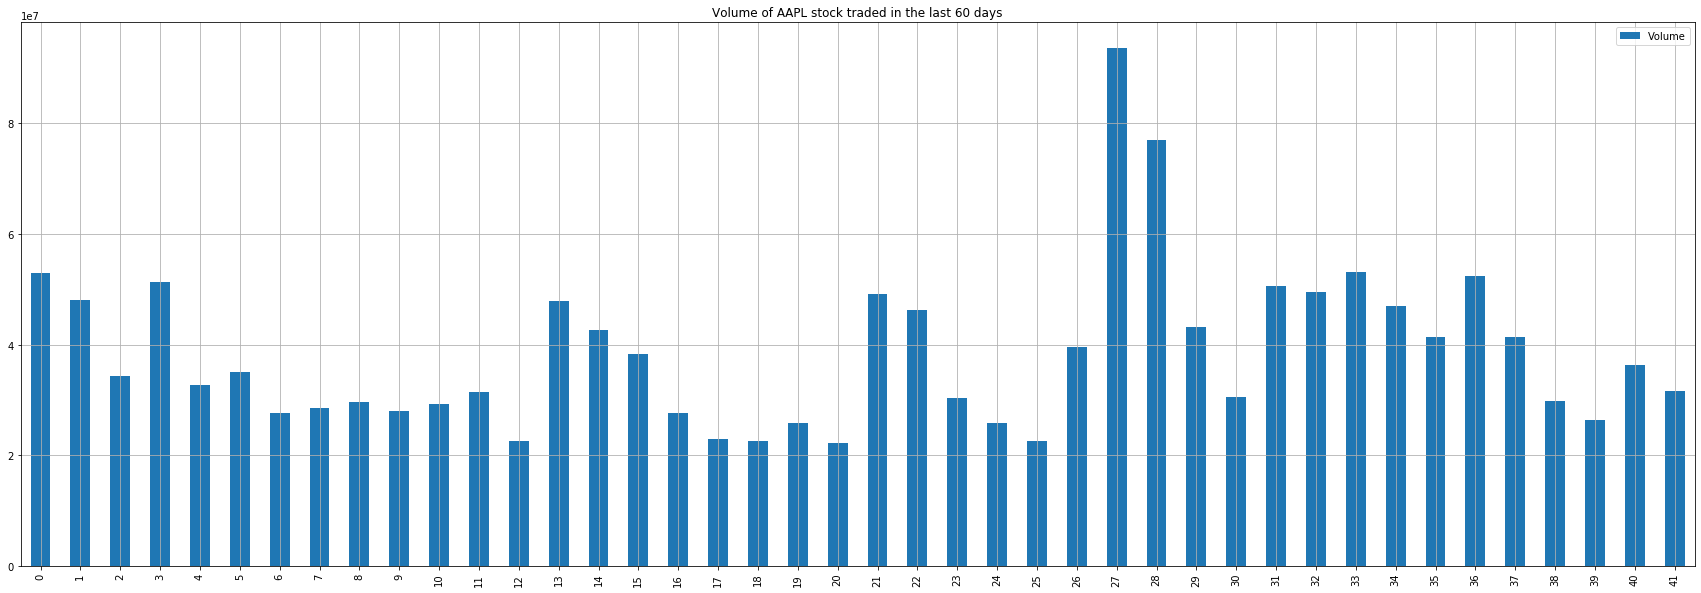

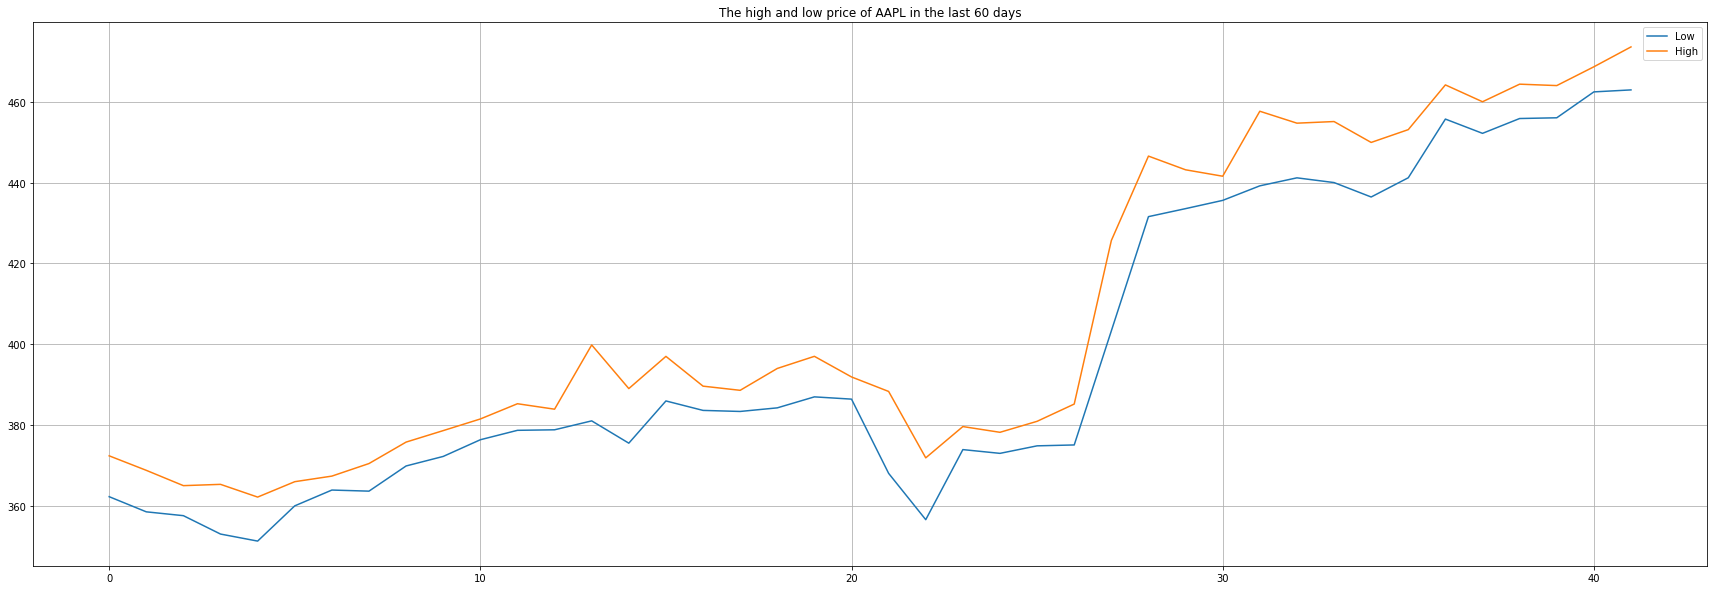

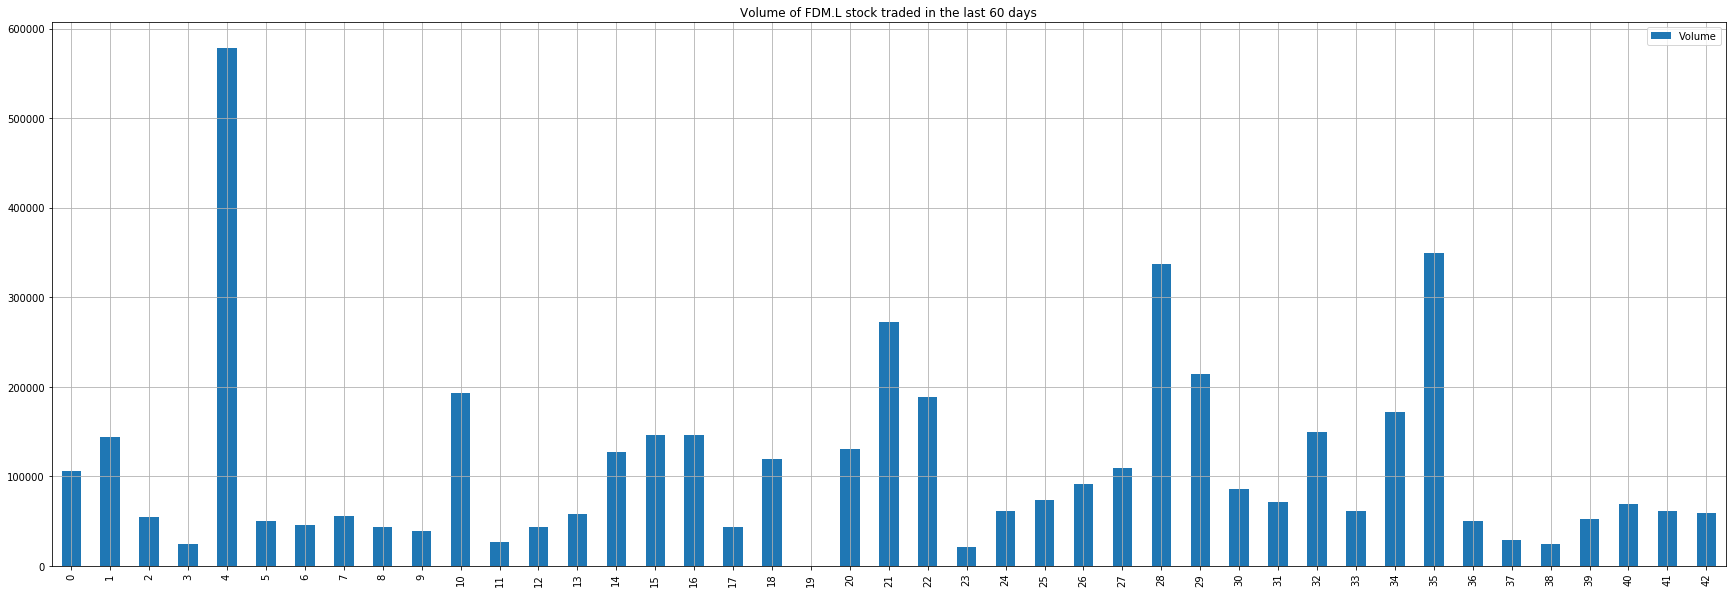

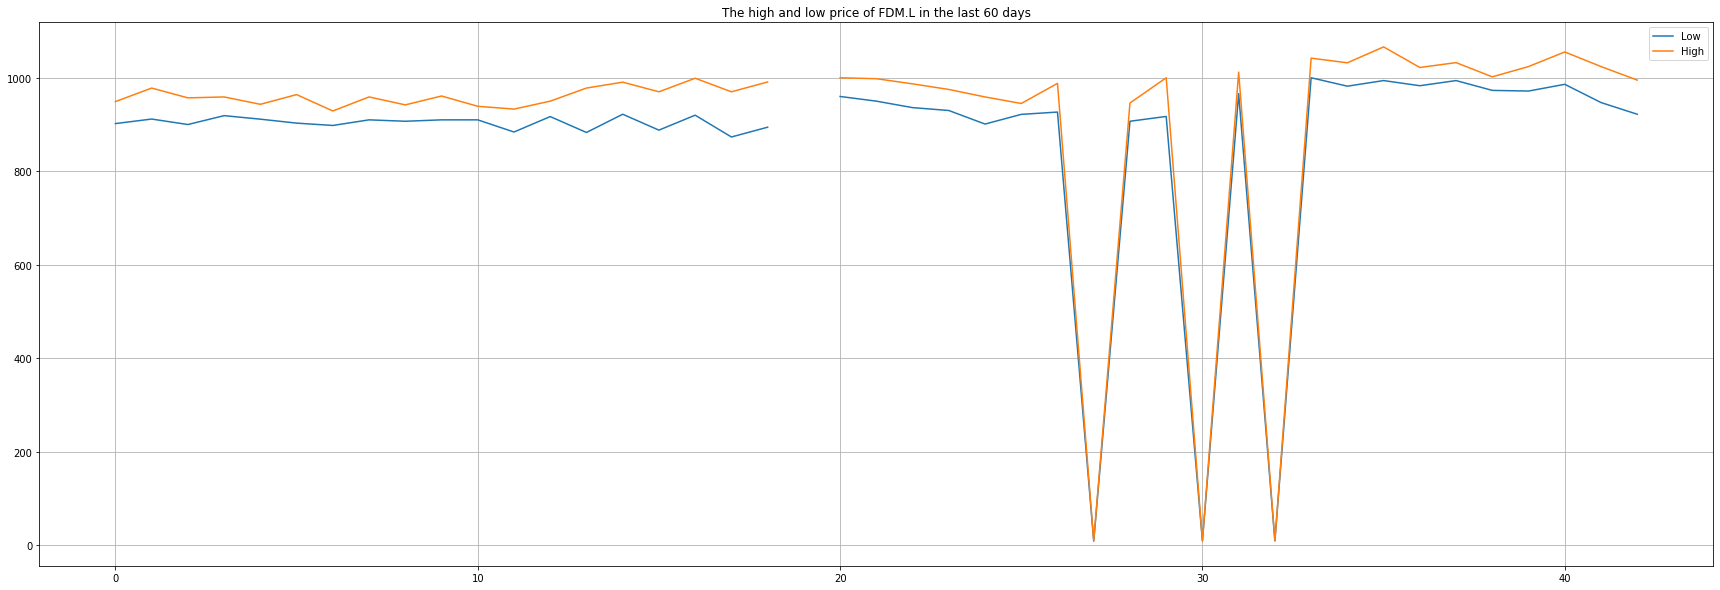

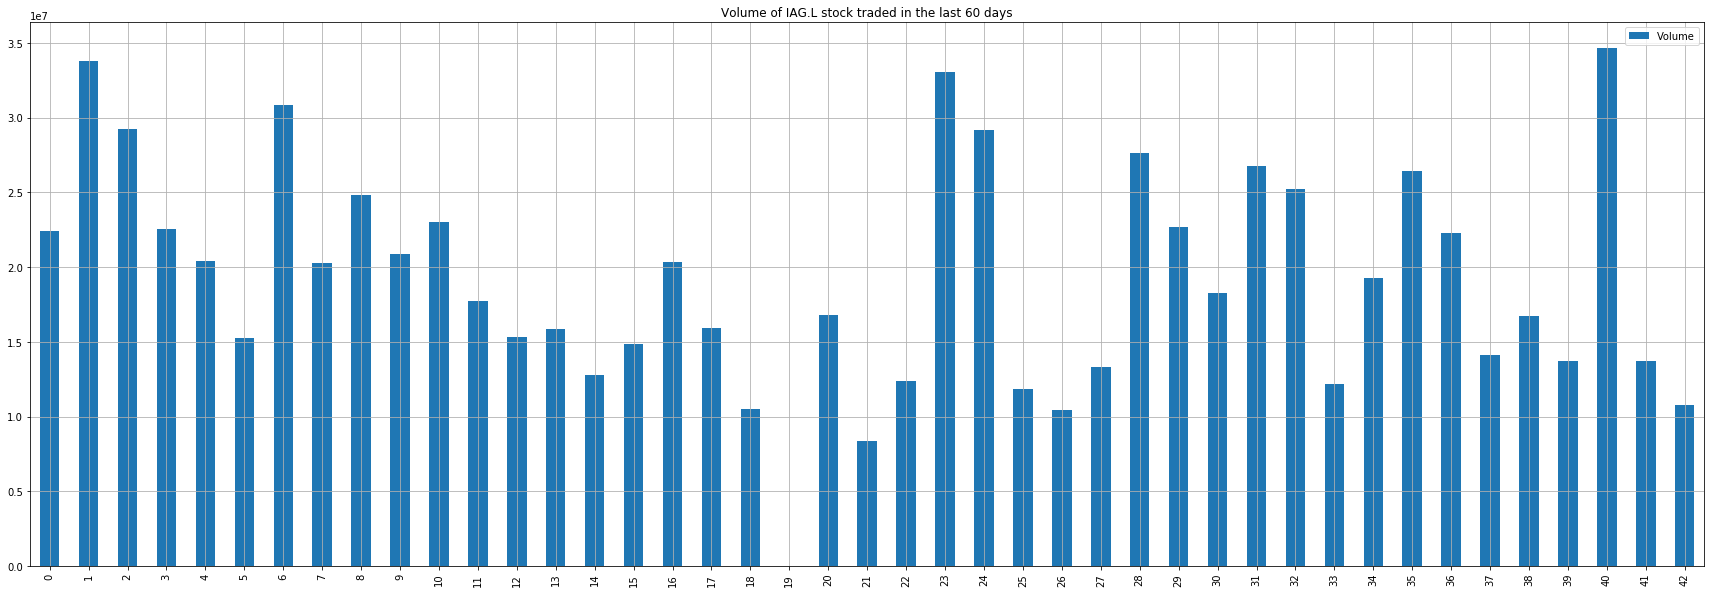

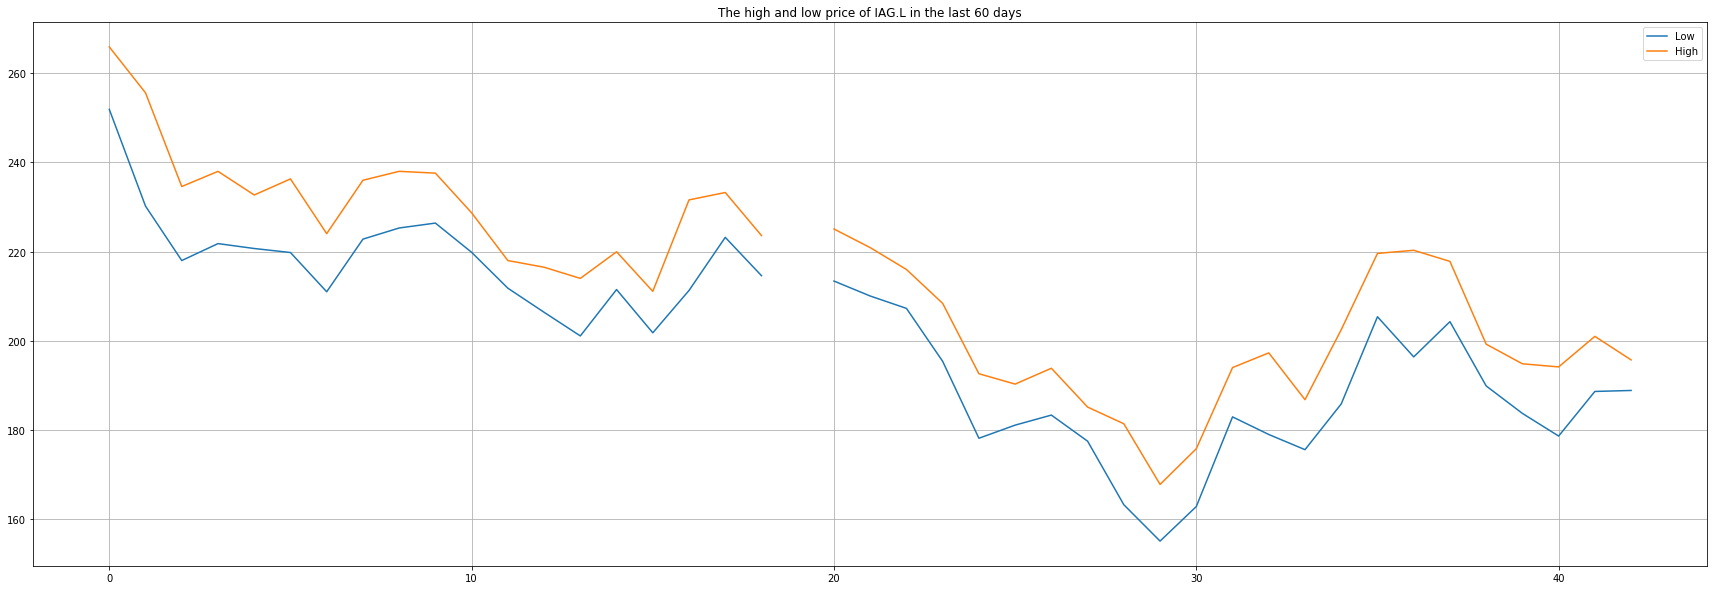

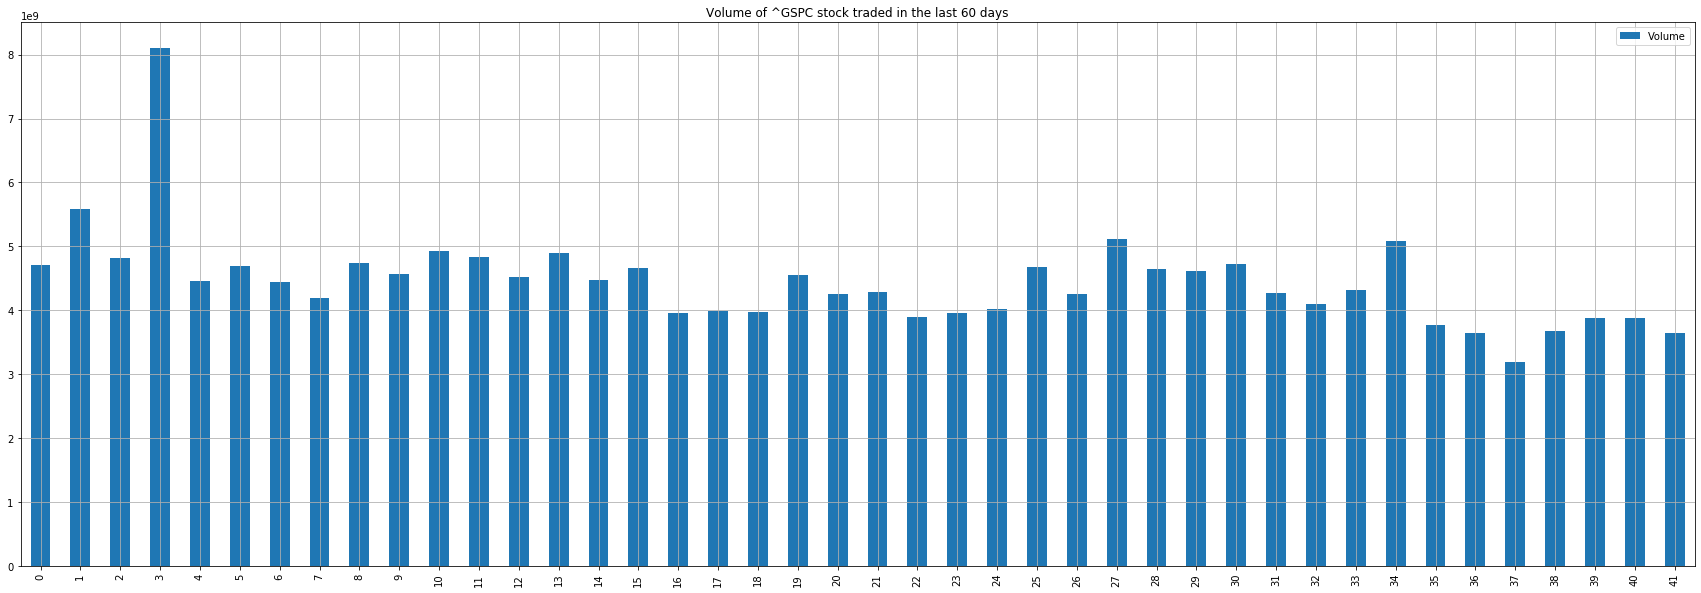

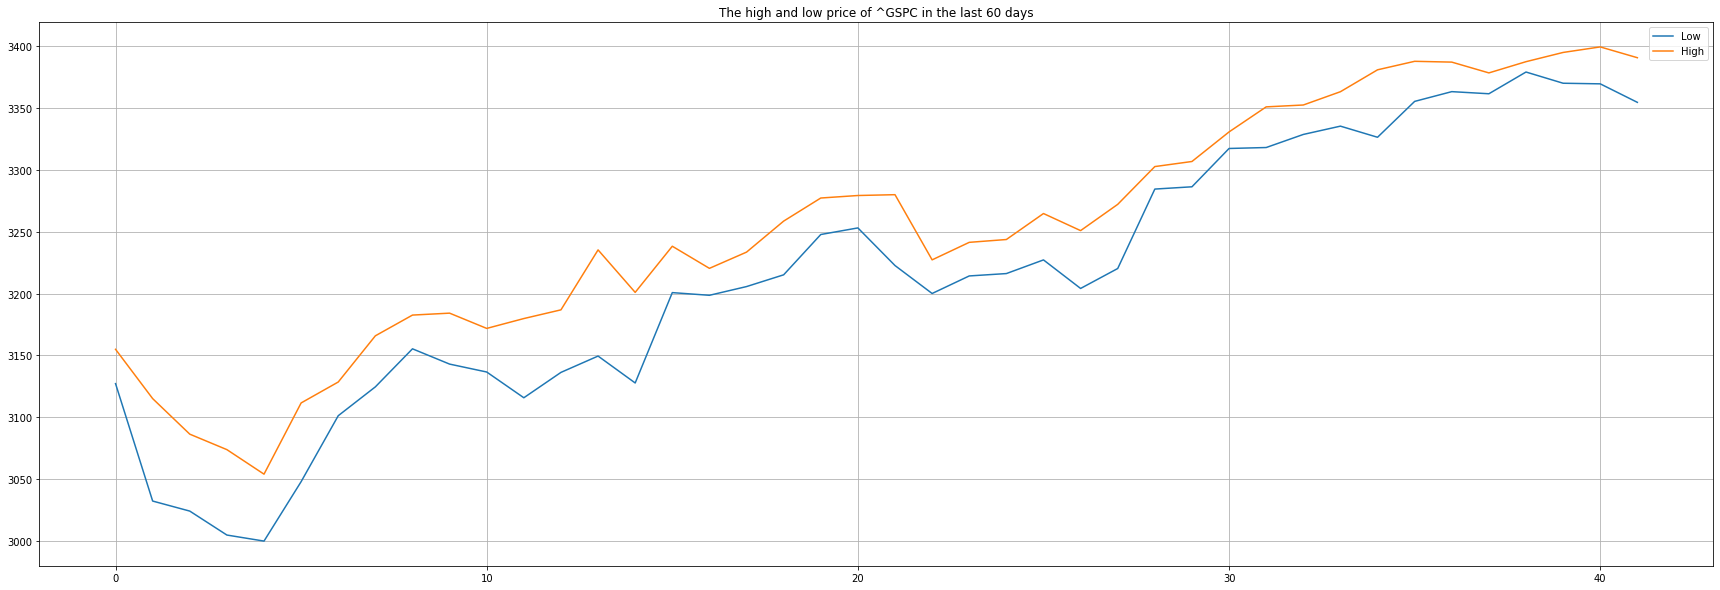

In [32]:
import numpy as np

x = 0
length = len(companies)

while x < length:
    list_of_companies = companies[x]
    x += 1
    
    file_name=list_of_companies + '.csv'
    filepath_name="/Users/yonis/python_projects/Yahoo_Finance_Historical_Data/Data/"+file_name
    df=pd.read_csv(filepath_name)
    
    
    #Volume of trades for each company 
    Volume = df[['Date', 'Volume']]
    title_volume= "Volume of " + list_of_companies + " stock traded in the last days_back days".replace('days_back',days_back)
    
    
    #High and Low price for each company on a given day
    price_difference=df[['Date','Low','High']]
    title_price="The high and low price of " + list_of_companies + " in the last days_back days".replace('days_back',days_back)
    
    print(Volume.plot.bar(figsize=(30,10), title=title_volume).grid());
    print(price_difference.plot.line(figsize=(30,10),title=title_price).grid());
    
